In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from itertools import product

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('WAG_C_M.csv', ';', index_col=['month'], parse_dates=['month'], dayfirst=True)
df.head()

,WAG_C_M
month,
1993-01-01,15.3
1993-02-01,19.1
1993-03-01,23.6
1993-04-01,30.6
1993-05-01,37.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 284 entries, 1993-01-01 to 2016-08-01
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   WAG_C_M  284 non-null    float64
dtypes: float64(1)
memory usage: 4.4 KB


<Axes: xlabel='month'>

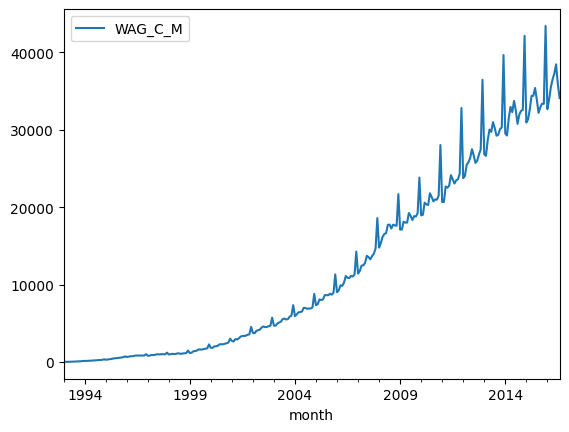

In [ ]:
df.plot()

In [ ]:
print(f'Критерий Дики-Фуллера: {sm.tsa.stattools.adfuller(df["WAG_C_M"])[1]}')

Критерий Дики-Фуллера: 0.9918495954854735


In [ ]:
# Избавляемся сначала от дисперсии во времени

df['WAG_C_M_box'], lamb = stats.boxcox(df['WAG_C_M'])
lamb

0.2632017541844584

In [ ]:
print(f'Критерий Дики-Фуллера для преобразованного столбца: {sm.tsa.stattools.adfuller(df["WAG_C_M_box"])[1]}')

Критерий Дики-Фуллера для преобразованного столбца: 0.696898763483273


<Axes: xlabel='month'>

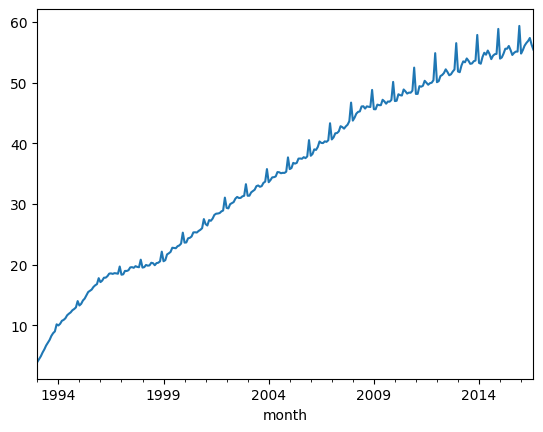

In [ ]:
df.WAG_C_M_box.plot()

In [ ]:
# убираем сезонность (но плохо)

df['WAG_C_M_box_diff'] = df.WAG_C_M_box - df.WAG_C_M_box.shift(1)

In [ ]:
print(f'Критерий Дики-Фуллера для столбца без сезона и дисперсии: {sm.tsa.stattools.adfuller(df["WAG_C_M_box_diff"][1:])[1]}')

Критерий Дики-Фуллера для столбца без сезона и дисперсии: 0.014396152164946852


<Axes: xlabel='month'>

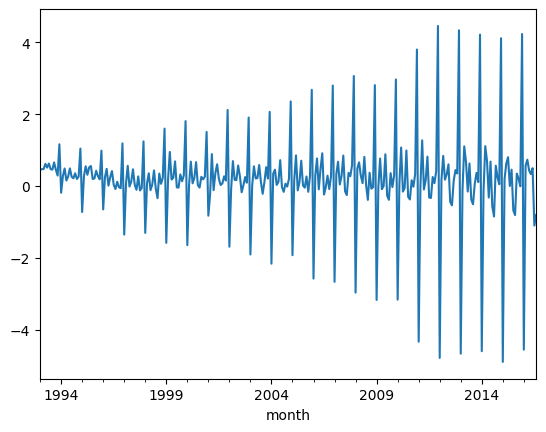

In [ ]:
df.WAG_C_M_box_diff.plot()

In [ ]:
df['WAG_C_M_box_diff_s'] = df.WAG_C_M_box_diff - df.WAG_C_M_box_diff.shift(12)

In [ ]:
print(f'Критерий Дики-Фуллера для столбца без сезона и дисперсии: {sm.tsa.stattools.adfuller(df["WAG_C_M_box_diff_s"][13:])[1]}')

Критерий Дики-Фуллера для столбца без сезона и дисперсии: 5.203603715821323e-08


<Axes: xlabel='month'>

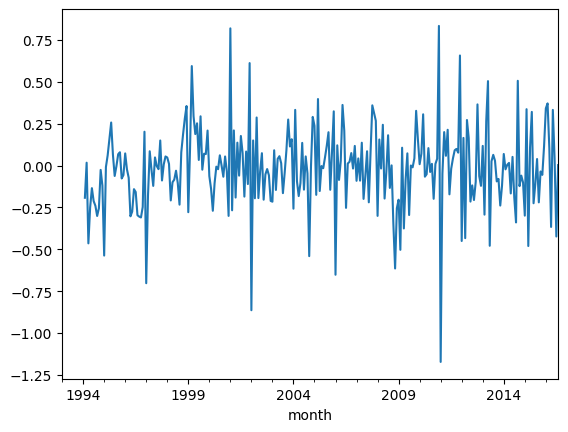

In [ ]:
df.WAG_C_M_box_diff_s.plot()

________________________

26.03.2024

In [ ]:
df = pd.read_csv('data.csv', sep=';', index_col='month', parse_dates=['month'], dayfirst=True)
df

,data
month,
1993-01-01,100.00
1993-02-01,99.04
1993-03-01,101.77
1993-04-01,110.05
1993-05-01,115.47
...,...
2023-08-01,277.90
2023-09-01,281.20
2023-10-01,289.70


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 372 entries, 1993-01-01 to 2023-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   data    372 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


<Axes: xlabel='month'>

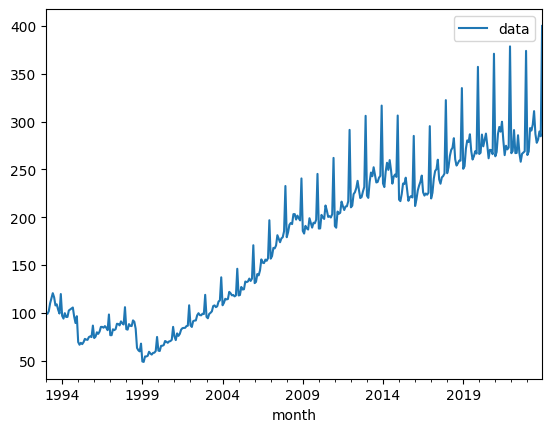

In [ ]:
df.plot()

Критерий Дики-Фуллера: 0.954079898071287


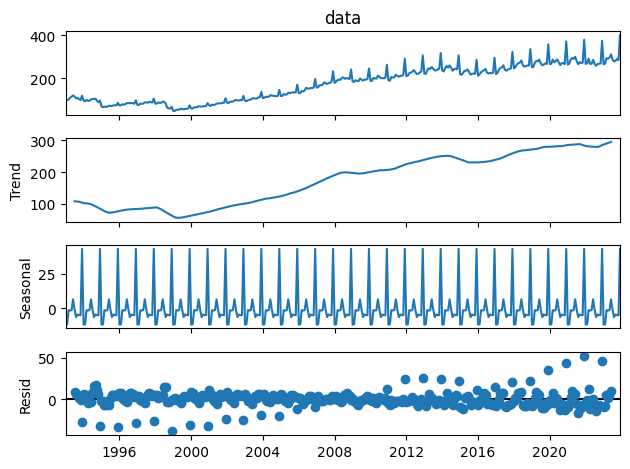

In [ ]:
sm.tsa.seasonal_decompose(df.data).plot()
print(f'Критерий Дики-Фуллера: {sm.tsa.stattools.adfuller(df.data)[1]}')

In [ ]:
df['data_box'], lamb = stats.boxcox(df['data'])
print(f'Параметр преобразования Бокса-Кокса: {lamb}')
print(f'Критерий Дики-Фуллера для преобразованного столбца: {sm.tsa.stattools.adfuller(df["data_box"])[1]}')

Параметр преобразования Бокса-Кокса: 0.49433245558695166
Критерий Дики-Фуллера для преобразованного столбца: 0.9311285711389586


In [ ]:
df.head()

,data,data_box
month,,
1993-01-01,100.00,17.685217
1993-02-01,99.04,17.591462
1993-03-01,101.77,17.856892
1993-04-01,110.05,18.640628
1993-05-01,115.47,19.137589


<Axes: xlabel='month'>

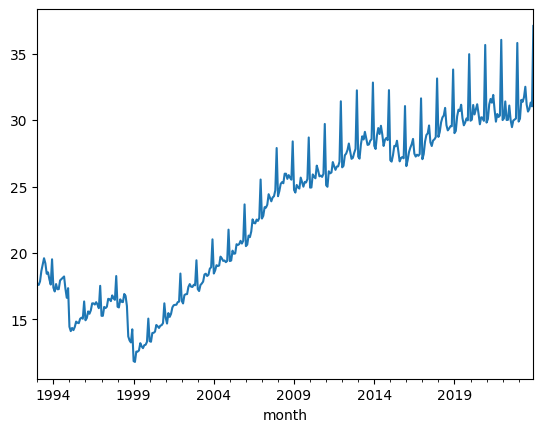

In [ ]:
df.data_box.plot()

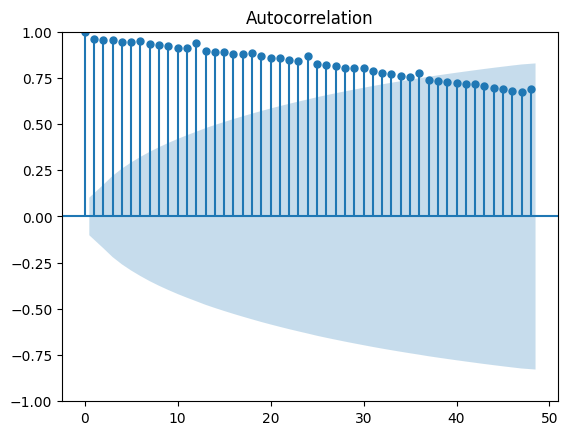

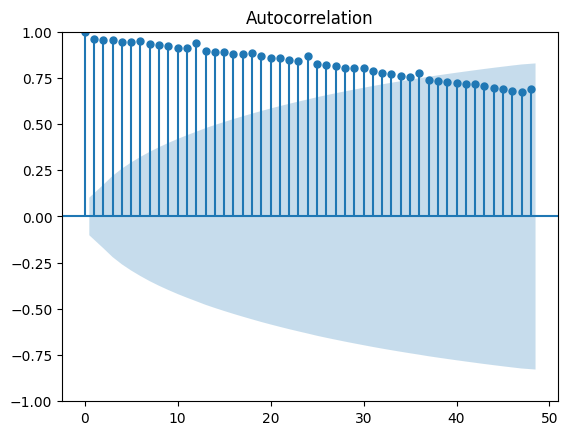

In [ ]:
sm.graphics.tsa.plot_acf(df.data_box.values, lags=48)

In [ ]:
df['data_box_diff'] = df.data_box - df.data_box.shift(1)
print(f'Критерий Дики-Фуллера для столбца без сезона и дисперсии: {sm.tsa.stattools.adfuller(df["data_box_diff"][1:])[1]}')

Критерий Дики-Фуллера для столбца без сезона и дисперсии: 0.0004124098215291389


In [ ]:
df.head(10)

,data,data_box,data_box_diff
month,,,
1993-01-01,100.00,17.685217,NaN
1993-02-01,99.04,17.591462,-0.093755
1993-03-01,101.77,17.856892,0.265430
1993-04-01,110.05,18.640628,0.783736
1993-05-01,115.47,19.137589,0.496962
1993-06-01,120.65,19.601635,0.464046
1993-07-01,116.38,19.219862,-0.381774
1993-08-01,107.85,18.435384,-0.784477
1993-09-01,108.93,18.536402,0.101018


<Axes: xlabel='month'>

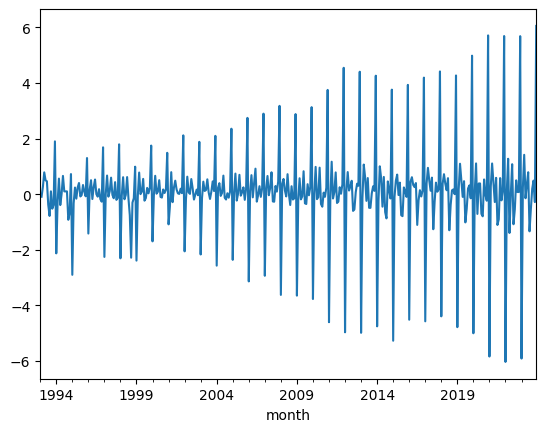

In [ ]:
df.data_box_diff.plot()

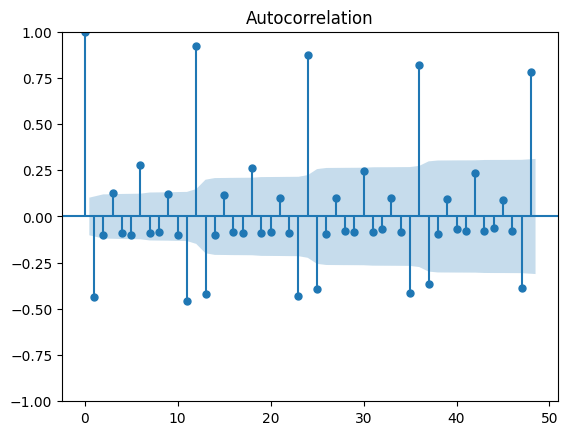

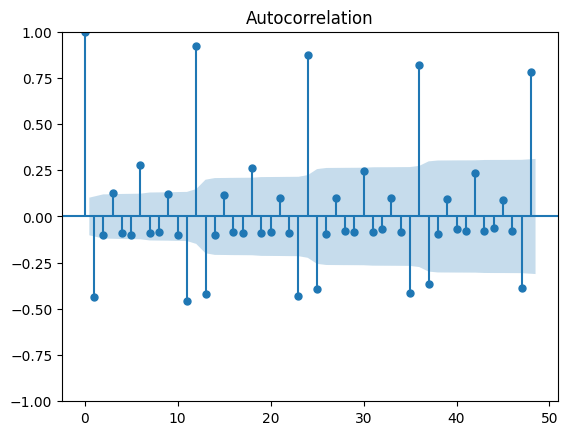

In [ ]:
sm.graphics.tsa.plot_acf(df.data_box_diff[1:].values, lags=48)

In [ ]:
df['data_box_diff_s'] = df.data_box_diff - df.data_box_diff.shift(12)
print(f'Критерий Дики-Фуллера для столбца без сезона и дисперсии: {sm.tsa.stattools.adfuller(df["data_box_diff_s"][13:])[1]}')

Критерий Дики-Фуллера для столбца без сезона и дисперсии: 1.7826301140012815e-15


<Axes: xlabel='month'>

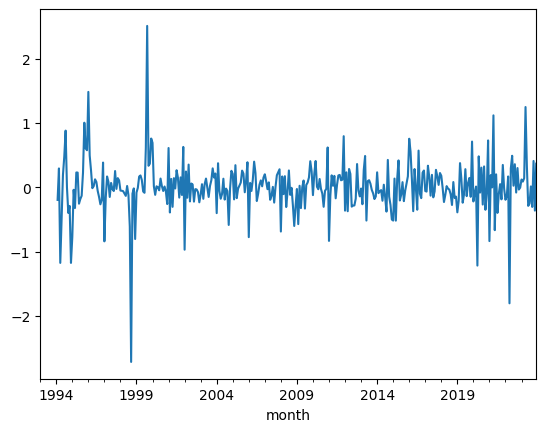

In [ ]:
df.data_box_diff_s.plot()

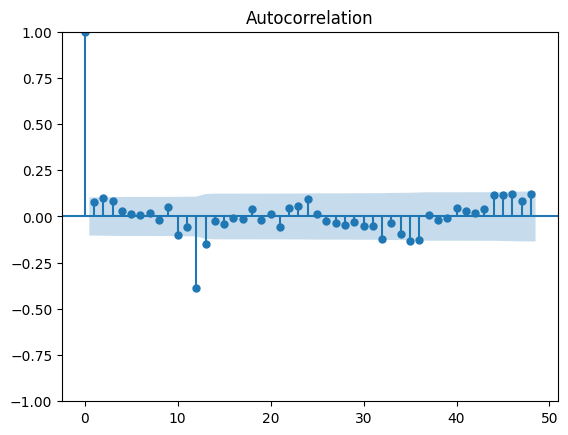

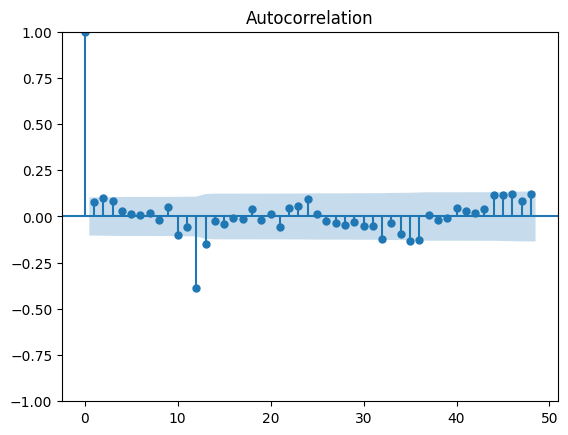

In [ ]:
sm.graphics.tsa.plot_acf(df.data_box_diff_s[13:].values, lags=48)

In [ ]:
d = 1 # простое дифф
D = 1 # сезонное дифф

(-0.4, 0.4)

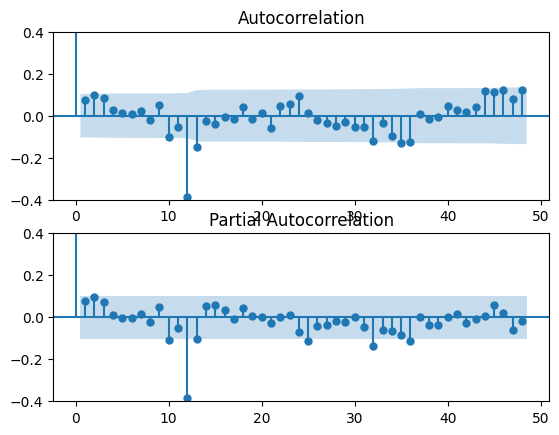

In [ ]:
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(df.data_box_diff_s[13:].values.squeeze(), lags=48, ax=ax)
plt.ylim([-.4, .4])


ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(df.data_box_diff_s[13:].values.squeeze(), lags=48, ax=ax)
plt.ylim([-.4, .4])

$Q = 3, q = 13, P = 3, p = 13$


In [ ]:
D = 1
d = 1
Q = range(4)
q = range(14)
P = range(4)
p = range(14)

In [ ]:
# уменьшение

D = 1 # сезонное дифф
d = 1 # трендовое дифф
Q = range(2)
q = range(6)
P = range(2)
p = range(6)

In [ ]:
parameters = list(product(p, q, P, Q))
print(len(parameters))
print(parameters[20])

144
(0, 5, 0, 0)


In [ ]:
results = []
best_aic = float('inf')

for param in parameters:
    model = sm.tsa.statespace.SARIMAX(
        df.data_box,
        order=(param[0], d, param[1]),
        seasonal_order=(param[2], D, param[3], 12)
    ).fit(disp=-1)
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [ ]:
df_result = pd.DataFrame(results)
df_result.columns = ['params', 'aic']
print(df_result.sort_values(by='aic')[:10])

          params         aic
74  (3, 0, 1, 0)  287.179757
14  (0, 3, 1, 0)  287.451241
75  (3, 0, 1, 1)  287.541890
15  (0, 3, 1, 1)  287.821795
34  (1, 2, 1, 0)  288.598446
3   (0, 0, 1, 1)  289.013972
78  (3, 1, 1, 0)  289.053399
98  (4, 0, 1, 0)  289.066803
54  (2, 1, 1, 0)  289.076438
35  (1, 2, 1, 1)  289.182936


In [ ]:
print(best_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                           data_box   No. Observations:                  372
Model:             SARIMAX(3, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -138.590
Date:                            Mon, 01 Apr 2024   AIC                            287.180
Time:                                    07:51:44   BIC                            306.596
Sample:                                01-01-1993   HQIC                           294.901
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0178      0.049     -0.362      0.717      -0.114       0.079
ar.L2          0.0738      0.065   

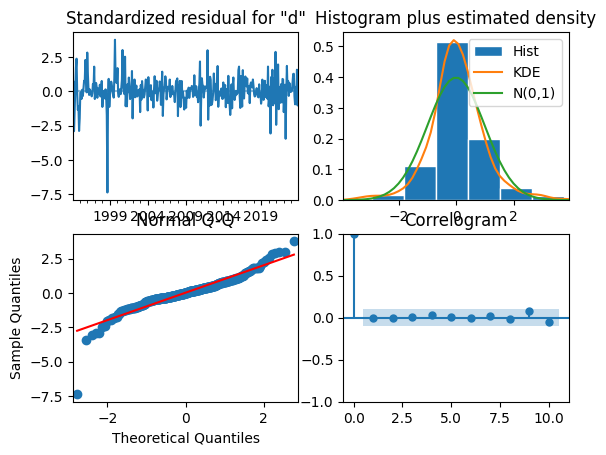

In [ ]:
best_model.plot_diagnostics();